In [ ]:
!pip install https://files.pythonhosted.org/packages/20/03/61d9950a0b83386b668a300370e40a81b5c919afdc9b7c41d20bb9021215/python-gantt-0.6.0.tar.gz

In [1]:
import pandas
pandas.__version__


'0.23.3'

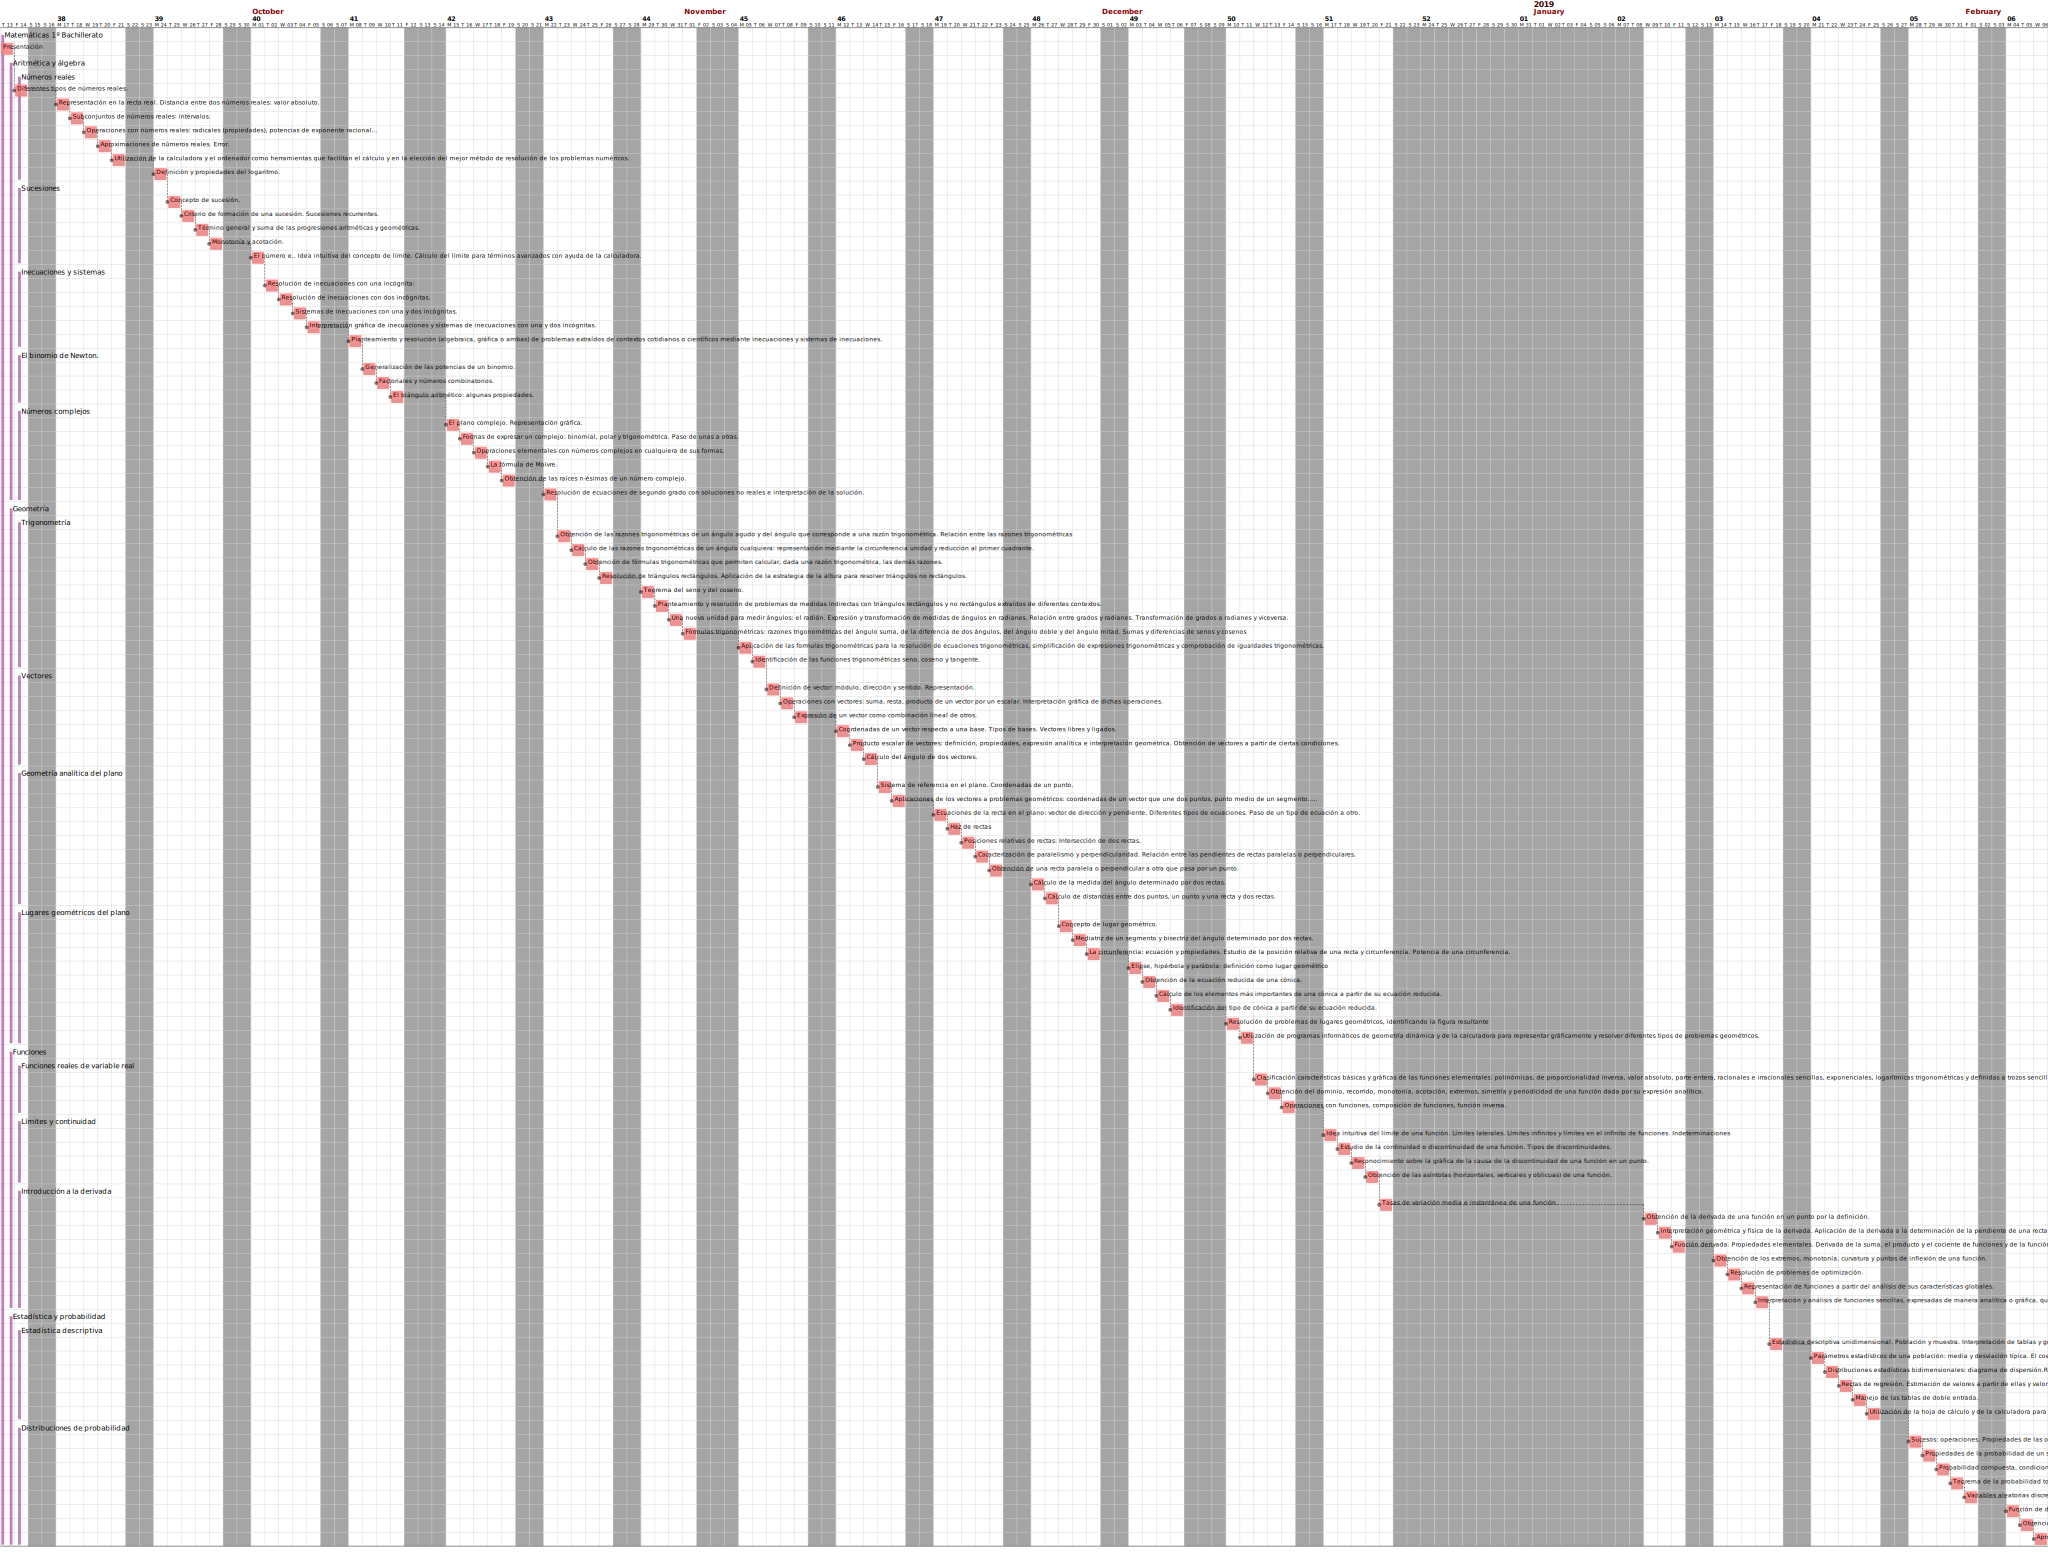

In [14]:
import pandas as pd
import datetime
from datetime import timedelta, date
import gantt

prog = pd.read_csv('prog_1bac_cn.csv')

c1 = 'Bloque'    
c2 = 'Unidad'    
c3 = 'Contenido'  

nombre_proyecto = 'Matemáticas 1º Bachillerato'

gantt.define_font_attributes(fill='black', stroke='black', stroke_width=0.001,  font_family="Verdana")

#gantt
hoy = datetime.date.today()
inicio = datetime.date(2018, 9, 13)
detalle = True

# Fiestas Pilar
inicio_vacas = date(2018, 10, 11) + timedelta(days=0)  # start date
vacaciones = 2  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))

# Puentes
inicio_vacas = date(2018, 11, 1) + timedelta(days=0)  # start date
vacaciones = 2  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))

inicio_vacas = date(2018, 12, 6) + timedelta(days=0)  # start date
vacaciones = 2  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))

# Navidad
inicio_vacas = date(2018, 12, 22) + timedelta(days=0)  # start date
vacaciones = 17  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))
    
# Semana Santa
inicio_vacas = date(2019, 4, 15) + timedelta(days=0)  # start date
vacaciones = 9  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))

p  = gantt.Project(name = nombre_proyecto, color='#FFFF40')

t1_ini = gantt.Project(name='Presentación', color='#FFFF40')
t2_ini = gantt.Project(name='Presentación', color='#FFFF40')
t3_ini = gantt.Task(name='Presentación',start = inicio, duration=1, color="#FF8080", display=detalle)


t1_anterior = t1_ini
t2_anterior = t2_ini
t3_anterior = t3_ini
p.add_task(t3_ini)

for n1 in list(prog.groupby(c1, sort = False).count().index): 
    # print('\n\n','BLOQUE TEMÁTICO:', n1)
    t1  = gantt.Project(name = n1, color='#FFFF40')
    for n2 in list(prog[prog[c1] == n1].groupby(c2, sort = False).count().index): 
        #print('\n\n','Unidad:', n2, '\n')
        t2  = gantt.Project(name = n2, color='#FFFF40')        
        for n3 in list(prog[prog[c2] == n2].groupby(c3, sort = False).count().index): 
            #print(n3, prog[prog[c3] == n3].sum()['Duracion'], end='/ ')
            t3_actual = gantt.Task(name=n3,depends_of=t3_anterior, duration= prog[prog[c3] == n3].sum()['Duracion'], color="#FF8080", display=detalle)
            t2.add_task(t3_actual)
            t3_anterior = t3_actual
        t1.add_task(t2)
    p.add_task(t1)  
    
    
#p.make_svg_for_tasks(filename='prueba.svg', scale=gantt.DRAW_WITH_WEEKLY_SCALE, title_align_on_left=False)
p.make_svg_for_tasks(filename='prueba.svg', scale=gantt.DRAW_WITH_DAILY_SCALE, title_align_on_left=False)
#p.make_svg_for_tasks(filename='prueba.svg')


from IPython.core.display import SVG
SVG(filename='prueba.svg')
            
            


In [2]:
import pandas as pd
prog = pd.read_csv('prog_1bac_cn.csv')
#for grupo in list(prog.groupby('Bloque').first().index): print(grupo)

c1 = 'Bloque'    
c2 = 'Unidad'    
c3 = 'Contenido'   


for n1 in list(prog.groupby(c1, sort = False).count().index): 
    print('\n\n','BLOQUE TEMÁTICO:', n1)
    for n2 in list(prog[prog[c1] == n1].groupby(c2, sort = False).count().index): 
        print('\n\n','Unidad:', n2, '\n')
        for n3 in list(prog[prog[c2] == n2].groupby(c3, sort = False).count().index): 
            print(n3, end='/ ')
        
 
        
        
        
#list(prog.groupby('Bloque').first().index)

len(list(prog.groupby('Bloque').first().index))

g = list(prog.groupby('Bloque').first().index)[0]
g
    
prog[prog['Bloque'] == g].groupby([c1,c2,c3], sort = False).sum()

#prog.groupby(['Bloque','Unidybad'])['Duracion'].count()



 BLOQUE TEMÁTICO: Aritmética y álgebra


 Unidad: Números reales 

Diferentes tipos de números reales./ Representación en la recta real. Distancia entre dos números reales: valor absoluto./ Subconjuntos de números reales: intervalos./ Operaciones con números reales: radicales (propiedades), potencias de exponente racional…/ Aproximaciones de números reales. Error./ Utilización de la calculadora y el ordenador como herramientas que facilitan el cálculo y en la elección del mejor método de resolución de los problemas numéricos./ Definición y propiedades del logaritmo./ 

 Unidad: Sucesiones 

Concepto de sucesión./ Criterio de formación de una sucesión. Sucesiones recurrentes./ Término general y suma de las progresiones aritméticas y geométricas./ Monotonía y acotación./ El número e.. Idea intuitiva del concepto de límite. Cálculo del límite para términos avanzados con ayuda de la calculadora./ 

 Unidad: Inecuaciones y sistemas 

Resolución de inecuaciones con una incógnita:/ Resoluci

Duracion
Bloque               Unidad                  Contenido                                                   
Aritmética y álgebra Números reales          Diferentes tipos de números reales.                        1
                                             Representación en la recta real. Distancia entr...         1
                                             Subconjuntos de números reales: intervalos.                1
                                             Operaciones con números reales: radicales (prop...         1
                                             Aproximaciones de números reales. Error.                   1
                                             Utilización de la calculadora y el ordenador co...         1
                                             Definición y propiedades del logaritmo.                    1
                     Sucesiones              Concepto de sucesión.                                      1
                                             Criterio de formación de una sucesión. Sucesion...         1
                                             Término general y suma de las progresiones arit...         1
                                             Monotonía y acotación.                                     1
                                             El número e.. Idea intuitiva del concepto de lí...         1
                     Inecuaciones y sistemas Resolución de inecuaciones con una incógnita:              1
                                             Resolución de inecuaciones con dos incógnitas.             1
                                             Sistemas de inecuaciones con una y dos incógnitas.         1
                                             Interpretación gráfica de inecuaciones y sistem...         1
                                             Planteamiento y resolución (algebraica, gráfica...         1
                     El binomio de Newton.   Generalización de las potencias de un binomio.             1
                                             Factoriales y números combinatorios.                       1
                                             El triángulo aritmético: algunas propiedades.              1
                     Números complejos       El plano complejo. Representación gráfica.                 1
                                             Formas de expresar un complejo: binomial, polar...         1
                                             Operaciones elementales con números complejos e...         1
                                             La fórmula de Moivre.                                      1
                                             Obtención de las raíces n-ésimas de un número c...         1
                                             Resolución de ecuaciones de segundo grado con s...         1

In [5]:
g = list(prog.groupby('Bloque').first().index)[0]
g

h = list(prog.groupby(['Bloque','Unidad','Contenido'], sort = False).sum().index)
h

[('Aritmética y álgebra',
  'Números reales',
  'Diferentes tipos de números reales.'),
 ('Aritmética y álgebra',
  'Números reales',
  'Representación en la recta real. Distancia entre dos números reales: valor absoluto.'),
 ('Aritmética y álgebra',
  'Números reales',
  'Subconjuntos de números reales: intervalos.'),
 ('Aritmética y álgebra',
  'Números reales',
  'Operaciones con números reales: radicales (propiedades), potencias de exponente racional…'),
 ('Aritmética y álgebra',
  'Números reales',
  'Aproximaciones de números reales. Error.'),
 ('Aritmética y álgebra',
  'Números reales',
  'Utilización de la calculadora y el ordenador como herramientas que facilitan el cálculo y en la elección del mejor método de resolución de los problemas numéricos.'),
 ('Aritmética y álgebra',
  'Números reales',
  'Definición y propiedades del logaritmo.'),
 ('Aritmética y álgebra', 'Sucesiones', 'Concepto de sucesión.'),
 ('Aritmética y álgebra',
  'Sucesiones',
  'Criterio de formación de 

In [57]:
prog = pd.read_csv('prog_1bac_cn.csv')
prog['Duracion'].sum()

89

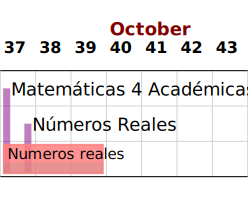

In [6]:
# https://pypi.org/project/python-gantt/

import datetime
from datetime import timedelta, date
import gantt

gantt.define_font_attributes(fill='black', stroke='black', stroke_width=0.001,  font_family="Verdana")

#gantt
hoy = datetime.date.today()
inicio = datetime.date(2017, 9, 12)
detalle = False

# Puente Inmaculada
inicio_vacas = date(2017, 12, 6) + timedelta(days=0)  # start date
vacaciones = 3  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))

# Navidad
inicio_vacas = date(2017, 12, 23) + timedelta(days=0)  # start date
vacaciones = 16  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))
    
# Semana Santa
inicio_vacas = date(2018, 3, 29) + timedelta(days=0)  # start date
vacaciones = 11  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))

p = gantt.Project(name='Matemáticas 4 Académicas', color='#FFFF40')

p0 = gantt.Project(name='Presentación', color='#FFFF40')
t01 = gantt.Task(name='Presentación',start = inicio, duration=1, color="#FF8080", display=detalle)

p0.add_task(t01)

# Tema 1
p1 = gantt.Project(name='Números Reales', color='#FFFF40')
t11 = gantt.Task(name='Representación de números reales',depends_of=t01, duration=5, color="#FF8080", display=detalle)
t12 = gantt.Task(name='Números radicales',depends_of=t11, duration=10, color="#FF8080", display=detalle)
t13 = gantt.Task(name='Logaritmos',depends_of=t12, duration=10, color="#FF8080", display=detalle)
t10 = gantt.Task(name='Numeros reales', start=t11.start_date(), duration = 10 ,color="#FF8080", display= not(detalle))

p1.add_task(t11)
p1.add_task(t12)
p1.add_task(t13)
p1.add_task(t10)

# Añadir los temas
p.add_task(p0)
p.add_task(p1)


# Crear el svg

p.make_svg_for_tasks(filename='prueba.svg', scale=gantt.DRAW_WITH_WEEKLY_SCALE, title_align_on_left=False)
#p.make_svg_for_tasks(filename='prueba.svg')


from IPython.core.display import SVG
SVG(filename='prueba.svg')


In [11]:
gantt.Task?